# MEMBERS
### Kyle Adrian del Castillo
### Alwyn Dy
### Charles Vladimir Lardizabal
### Jose Angelo Virgil Quilario
### Herald Ethan Segovia

# Machine Problem 1: Parameter Estimation
**Instructions:** Propose the best distribution that best models the given data. To be systematic, you may adopt the following methodology in presenting your results:
- **Step 1.** Visualize the data using a histogram to determine the "most likely" distribution of the data.
- **Step 2.** Determine the probability mass function (or probability density function) of the speculated discrete (or continuous) distribution.
- **Step 3.a** Compute the parameters of the p.m.f. (or p.d.f) using:
    - Method of Moments (MoM)
    - Maximum Likelihood Estimation (MLE)
- **Step 3.b** Determine if the MoM and MLE yield the same estimates. If the estimates are different, select either of the two and justify your choice.
- **Step 4.a** Generate simulated data, $\hat{X}$, by drawing random samples from the model (i.e., the distribution with the estimated parameters).
- **Step 4.b** Compare the original data $X$ with the simulated data $\hat{X}$ to check if they come from the same distribution.
- **Step 5** If they come from the same distribution, propose the model. Otherwise, return to **<em>Step 2</em>**.

You are provided with the following functions (written in JULIA) that can help you diagnose the model:
- **<em>plot_reconstruction</em>** plots the original data against the simulated data.
- **<em>get_p_val</em>** computes the p-value when comparing the original data and the simulated data using the <em>Approximate Two Sample Kolmogorov-Smirnov Test</em>. <em> Note: the null hypothesis of this test states that the compared groups are drawn from the same distribution.</em>
- **<em>if_dist_different</em>** extends **<em>get_p_val</em>** with a decision on whether or not there is sufficient evidence to reject the null hypothesis.

In [ ]:
### This loads the libraries needed for this exercise
using Distributions
using Plots
using CSV
using DataFrames
using HypothesisTests

In [7]:
function plot_reconstruction(orig_data, recon_data, bins=100)
    p_val = get_p_val(orig_data, recon_data)
    if p_val < 0.0001
        p_label = "< 0.0001"
    else
        p_label = "=$p_val"
    end
    p1 = histogram(orig_data, bins=bins, normalize=:true,color=:red, label="Original")
    p2 = histogram(recon_data, bins=bins, normalize=:true,color=:green, label="Reconstruction (p "* p_label * ")")
    fig = plot(p1,p2, layout=(2,1))
    display(fig)
end

function get_p_val(original, reconstruction,precision=3)
    z = ApproximateTwoSampleKSTest(original, reconstruction)
    p = pvalue(z)
    return round(p, digits=precision)
end

function if_dist_different(original, reconstruction, alpha=0.05)
    p = get_p_val(original, reconstruction)
    if p <= alpha
        if p >= 0.0001
            print("The two distributions are significantly different (p = $p)")
        else
            print("The two distributions are significantly different (p < 0.0001)")
        end
    else
        print("The two distributions are not significantly different (p = $p)")   
    end
end

if_dist_different (generic function with 2 methods)

# Exercise 1

## Step 1

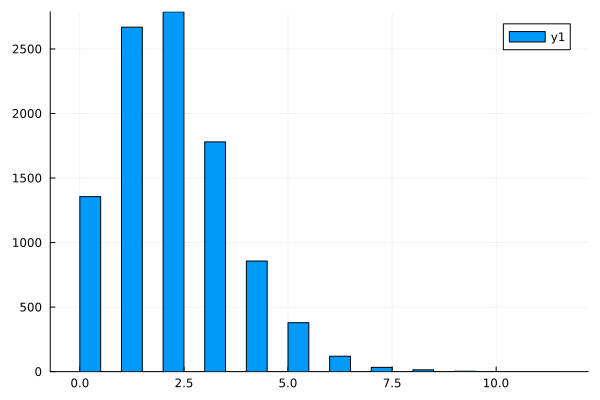

In [2]:
dataset = CSV.read("ex1_data.csv", DataFrame);
X = dataset[!,2];

## Step 1
fig1 = plot()
histogram(X,bins=20)

## Step 2
The data are most likely samples from a Poisson distribution with a PMF of:
$$P(X = x) =  \frac{λ^{x} e^{-λ}}{x!}$$

## Step 3
### Method of Moments
Poisson distribution follows the format:
$$\mathbb{E}\left[X\right] = λ $$

By equating the first population mean to the first sample mean, we can acquire the Method of Moments estimator.
$$\mathbb{E}\left[X\right] = \bar{X}λ = \bar{X}$$

After simplification, we acquire the method of moments estimator:
$$ λ = \bar{X}$$

### Maximum Likelihood Estimation
We can easily solve the MLE via the solution below:
$$ 
\begin{aligned}
L(λ|\xi) &= \prod_{i=1}^{n}f(x_i|λ)
\\
&= \prod_{i=1}^{n}\frac{λ^{x} e^{-λ}}{x!} \textit{ insert the PMF of Poisson}
\\
&\textit{ take the log-likelihood}
\\
l(λ|\xi) &= \sum_{i=1}^{n} ln\Big(\frac{λ^{x} e^{-λ}}{x!}\Big)
\\
&= \sum_{i=1}^{n} ( ln(λ^{x_{i}}e^{-λ}) - ln(x_{i}!) )
\\
&= \sum_{i=1}^{n} ( ln(λ^{x_{i}}) + ln(e^{-λ})- ln(x_{i}!) )
\\
&= \sum_{i=1}^{n} ( x_{i}ln(λ) - λ ln(e) - ln(x_{i}!))
\\
&= \sum_{i=1}^{n} ( x_{i}ln(λ) - λ - ln(x_{i}!))
\\
\frac{\partial}{\partial λ} l(λ) &= \sum_{i=1}^{n} (\frac{\partial}{\partial λ}(x_{i}ln(λ)) - \frac{\partial}{\partial λ}(λ) - \frac{\partial}{\partial λ}(ln(x_{i}!)))
\\
0 &= \sum_{i=1}^{n}(\frac{x_{i}}{λ} - 1)
\\
&= \sum_{i=1}^{n} (\frac{x_{i}}{λ}) - n \textit{ (transpose n to the left side)}
\\
n &= \sum_{i=1}^{n} (\frac{x_{i}}{λ}) \textit{ (multiply both sides with λ)}
\\
λ &= \frac{1}{n}\sum_{i=1}^{n} (x_{i}) \textit{ (divide both sides with n)}
\end{aligned}
$$


The MLE estimator for parameter λ is just the sample mean (same as MoM).

## Step 3.a

In [3]:
## Step 3.a.: Compute the estimates using MLE or MoM. Code the estimators as functions. 
function mle_lambda_poisson(samples)
    n = length(samples)
    return sum(samples) / n
end

function mom_lambda_poisson(samples)
    n = length(samples)
    return sum(samples) / n
end

mom_lambda_poisson (generic function with 1 method)

## Step 3.b

In [12]:
## Step 3.b. They should be the same in this case
mle_λ = mle_lambda_poisson(X)
mom_λ = mom_lambda_poisson(X)

print(mle_λ)
print("\n")
print(mom_λ)
# Both yield the same results

10.00749
10.00749

## Step 4.a

In [5]:
## Step 4.a
λ = mle_lambda_poisson(X)
sim_d = Poisson(λ)
X̂ = rand(sim_d, 10000);

## Step 4.b

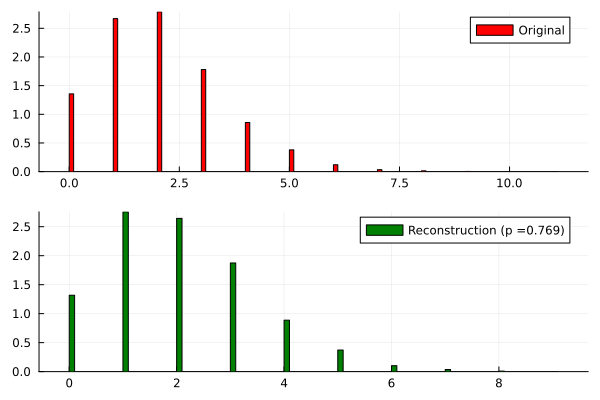

The two distributions are not significantly different (p = 0.769)

In [8]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

## Step 5
The test suggests that the two datasets are drawn from the Poisson distribution. Thus, we will propose the estimates derived by the MLE and MoM

# Exercise 2

## Step 1: Plot the histogram

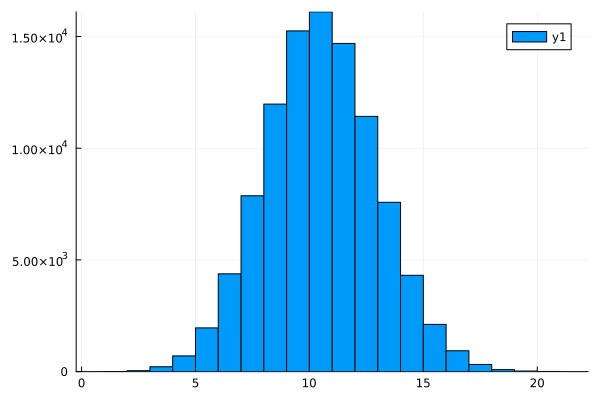

In [9]:
dataset = CSV.read("ex2_data.csv", DataFrame);
X = dataset[!,2];

fig1 = plot()
histogram(X,bins=20)

## Step 2: Determine the probability mass function
The data is likely a binomial distribution. The probability mass function of the Binomial distribution is given by $P\left(x\right | N,p) = {N \choose x} p^{x}\left(1-p\right)^{N-x}$.<br>

## Step 3.a: Compute the parameters of the p.m.f.
#### Method of moments
We know beforehand that $\mathbb{E}\left[X\right] = Np$. Hence, let $X$ be Binomial random variable with parameters $N,p$.

$$
\begin{aligned}
\mathbb{E}\left[X\right] &= \frac{1}{N}\sum_{i}X_i \\

Var\left[X\right] &= \frac{1}{N}\sum_i \left(X_i - \bar{x}\right)^2\\

Np &= \frac{1}{n}\sum_{i}X_i \text{ (Eqn 1) }, \\

Np(1-p) &= \frac{1}{N}\sum_i \left(X_i - \bar{x}\right)^2 \text{ (Eqn 2) }\\
\end{aligned}
$$

We can rewrite Eqn 1 as $N^2 p = \sum_i {X_i}$ and Eqn 2 as $N^2 p \left(1-p\right) = \sum_i \left(X_i - \bar{x}\right)^2$. Thus, we have: 
$$
\begin{aligned}
1 - p = \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}.
\end{aligned}
$$

By simplifying the expression, we would result to
$$
\begin{aligned}
p \approx \hat{p} = 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}
\end{aligned}
$$

By subtituting this p into Equation 1, we would get
$$
\begin{aligned}
\bar{x} = N\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)
\end{aligned}
$$

Isolating N, we would get
$$
\begin{aligned}
N \approx \hat{N} = \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}
\end{aligned}
$$

#### Maximum Likelihood Estimation
Let $X$ be Binomial random variable with parameters $N,p$.

$$
\begin{aligned}
L(N, p|\xi)=&P(X_1=x_1, X_2=x_2, ... X_n=x_n|N, p)\\
=&\prod_{i=1}^{n}f(x_i|N, p)\\
=&\prod_{i=1}^{n}{N \choose x} p^{x}\left(1-p\right)^{N-x}\\
=&{N \choose x}^{n}{p^{\sum_{i=1}^{n}x_{i}}}{(1-p)^{\sum_{i=1}^{n}N-x_{i}}}\\

&\textit{taking the log-likelihood, }\\
l(N, p|\xi)=&ln\Big({N \choose x}^{n}{p^{\sum_{i=1}^{n}x_{i}}}{(1-p)^{\sum_{i=1}^{n}N-x_{i}}}\Big)\\
=&\ln({N \choose x}^{n})+\ln(p^{\sum_{i=1}^{n}x_{i}})+\ln\Big((1-p)^{\sum_{i=1}^{n}N-x_{i}}\Big)\\
=&n\ln({N \choose x})+\sum_{i=1}^{n}x_{i}\ln(p)+\Big(\sum_{i=1}^{n}N-x_{i}\Big)\ln(1-p)\\

&\textit{taking the partial derivative, }  &\\
\frac{\partial}{\partial p}l(p)=&\frac{\partial}{\partial p}n\ln({N \choose x})+\frac{\partial}{\partial p} \sum_{i=1}^{n}x_{i}\ln(p)+\frac{\partial}{\partial p} \Big(\sum_{i=1}^{n}N-x_{i}\Big)\ln(1-p)\\
0=& 0 + \frac{\partial}{\partial p} \sum_{i=1}^{n}x_{i}\ln(p)+\frac{\partial}{\partial p} \Big(\sum_{i=1}^{n}N-x_{i}\Big)\ln(1-p)\\
0=&\sum_{i=1}^{n}x_{i} \frac{\partial}{\partial p} \ln(p)+\Big(\sum_{i=1}^{n}N-x_{i}\Big)\frac{\partial}{\partial p} \ln(1-p)\\
0=&\sum_{i=1}^{n}x_{i}\frac{1}{p}+\Big(\sum_{i=1}^{n}N-x_{i}\Big)\frac{-1}{1-p}\\
0=&\frac{\sum_{i=1}^{n}x_{i}}{p}-\frac{\sum_{i=1}^{n}N-x_{i}}{1-p}\\
\Big(\frac{1-p}{\sum_{i=1}^{n}x_{i}}\Big)\Big(\frac{\sum_{i=1}^{n}x_{i}}{p}\Big)=&\Big(\frac{\sum_{i=1}^{n}N-x_{i}}{1-p}\Big)\Big(\frac{1-p}{\sum_{i=1}^{n}x_{i}}\Big)\\
\frac{1-p}{p}=&\frac{\sum_{i=1}^{n}N-x_{i}}{\sum_{i=1}^{n}x_{i}}\\
\frac{1}{p}-1=&\frac{\sum_{i=1}^{n}N-x_{i}}{\sum_{i=1}^{n}x_{i}}\\
\frac{1}{p}-1=&\frac{\sum_{i=1}^{n}N}{\sum_{i=1}^{n}x_{i}}- \frac{\sum_{i=1}^{n}x_{i}}{\sum_{i=1}^{n}x_{i}}\\
\Big(\frac{1}{p}\Big)^{-1}=&\Big(\frac{\sum_{i=1}^{n}N}{\sum_{i=1}^{n}x_{i}}\Big)^{-1}\\
p \approx \hat{p} =& \frac{\sum_{i=1}^{n}x_{i}}{\sum_{i=1}^{n}N}
\end{aligned}
$$

Looking at this MLE, we can transform this into the equation
$$
\begin{aligned}
\Big(\sum_{i=1}^{n}N\Big)p = \sum_{i=1}^{n}x_{i}
\end{aligned}
$$
This is similar to the equation, $\mathbb{E}\left[X\right]$ = Np. Hence, it is safe to assume that the MoM and MLE estimates are the same with one another. 

In [16]:
### MOM ###
function mom_p_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return 1 - sum_sq_diff/sum_x
end

function mom_n_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return mean_x / (1 - (sum_sq_diff/sum_x))
end
 
### MLE ###
function mle_n_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return mean_x / (1 - (sum_sq_diff/sum_x))
end

function mle_p_estimator(samples)
    N = mle_n_estimator(samples) * length(samples) 
    sum_x = sum(samples)
    return sum_x / N
end

mle_p_estimator (generic function with 1 method)

## Step 3.b: Determine if the MoM and MLE yield the same estimates

In [11]:
print("Method of moments: ", mom_p_estimator(X))
print("\n")
print("Maximum Likelihood Estimation: ", mle_p_estimator(X))

Method of moments: 0.40016588576156475
Maximum Likelihood Estimation: 0.40016588576156475

## Step 4.a: Generate simulated data

In [17]:
N = mom_n_estimator(X)
p = mom_p_estimator(X)
sim_d = Binomial(round(N),p)
X̂ = rand(sim_d, 100000);

## Step 4.b: Compare the original data with the simulated data

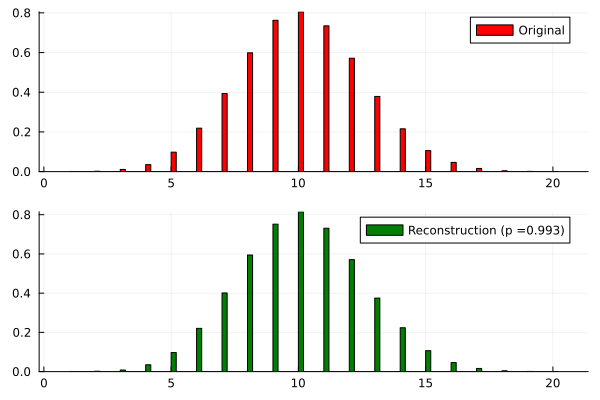

The two distributions are not significantly different (p = 0.993)

In [18]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

## Step 5: Conclusion
Based on the results, we can conclude that both are drawn from the same distribution since there is no significant difference between the two. In conclusion, we can propose the model derived from MoM and MLE.

$$
\begin{aligned}
p \approx \hat{p} =& 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i} \\

p \approx \hat{p} =& \frac{\sum_{i=1}^{n}x_{i}}{\sum_{i=1}^{n}N}\\

n \approx \hat{n} =& \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}
\end{aligned}
$$

# Exercise 3

In [19]:
dataset = CSV.read("ex3_data.csv", DataFrame);

## Step 1

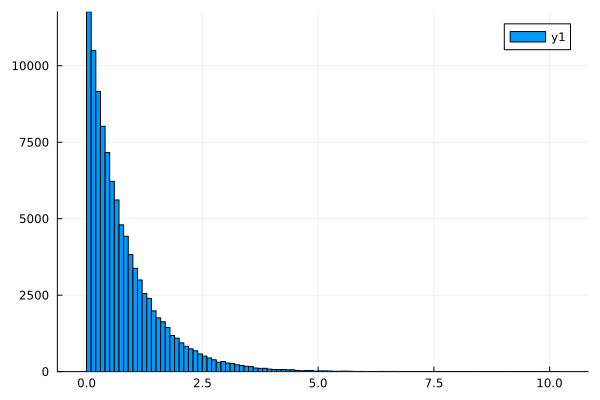

In [20]:
# Step 1
fig1 = plot()
X = dataset[!,2]
histogram(X,bins=100)

## Step 2

The data is likely exponential given the histogram. Therefore the probability density function of the univariate exponential distribution will be used:

$p\lparen x| \lambda\rparen = \lambda e^{-\lambda x}, x > 0 $

Julia Distribution package version:

$ f\lparen x;\theta\rparen = \frac{1}{\theta}e^{-\frac{x}{\theta}}, x >0 $

## Step 3

### Method of Moments
Let $X \sim P(x)$ of exponential distribution with parameter $\lambda$.


P.d.f. = $ p\lparen x| \lambda\rparen = \lambda e^{-\lambda x} $, $x > 0$ then
<br>

**Solution**:

Find first moment for parameter $\lambda$,

$\mathbb{E}\left[X\right] = \displaystyle\int_0^\infin x p(x)dx  $

$= \displaystyle\int_0^\infin x \lambda e^{-\lambda x} dx$, replaced $p(x)$ with p.d.f.

$= \frac{1}{\lambda} \displaystyle\int_0^\infin ye^{-y} dy$, substituting $y = \lambda x$


$= \frac{1}{\lambda} \bigg\lbrack{-e^{-y}-ye^{-y}}\bigg\rbrack_0^\infin$

$\mathbb{E}\left[X\right] = \frac{1}{\lambda} $

since $ \bar{x} = \frac{1}{n} \displaystyle\sum_{i=1}^n x_i$, then

$\mathbb{E}\left[X\right] = \bar{x}$, equating expected value to the arithmetic mean

$ \frac{1}{x} = \frac{1}{n} \displaystyle\sum_{i=1}^n x_i$, substituting $\mathbb{E}\left[X\right]$ with $\frac{1}{x}$ and $\bar{x}$ with $\frac{1}{n} \displaystyle\sum_{i=1}^n x_i$

therefore,

$ \tilde{\lambda} = \frac{1}{\frac{1}{n} \sum_{i=1}^n x_i} $ or $\tilde{\lambda} = \frac{1}{\bar{x}}$


###  Maximum Likelihood Extimation

Let $X \sim P(x)$ of exponential distribution with parameter $\lambda$ and the likelihood function $ L(\theta|\xi) = \prod_{i=1}^n f(x_i|\theta)$.


P.d.f. = $ p\lparen x| \lambda\rparen = \lambda e^{-\lambda x} $, $x > 0$, then
<br>

**Solution**:

$ L(\lambda|\xi) = \displaystyle\prod_{i=1}^n \lambda e^{-\lambda x_i}$, replace $f(x)$ with pdf of exponential dist...

$ = \lambda^ne^{-\lambda\sum x_i} $

$ \rArr \ln L = \ln \lambda^n + \ln e^{-\lambda\sum x_i}$

$= n \ln \lambda + (-\lambda\sum x_i) \ln e$

$L(\lambda|\xi) = n \ln \lambda - \lambda\sum x_i$

Getting the likelihood estimation

1st Derivative:

$\frac{d}{d\lambda} \log L = 0 \Rarr \frac{d}{d\lambda}(n \ln \lambda - \lambda\sum x_i) = 0$

$\frac{n}{\lambda} - \sum x_i = 0$

$\frac{n}{\lambda} = \sum x_i $

$\lambda = \frac{n}{\sum x_i}$

$\lambda = \frac{1}{\bar{x}}$, since the arithmetic mean is $\frac{\sum x_i}{n}$

2nd Derivative:

$\frac{d^2}{d\lambda^2} \log L \Rarr \frac{d^2}{d\lambda^2}(n\ln \lambda - \lambda\sum x_i)$

$\Rarr -\frac{n}{\lambda^2} - \sum0$

$\Rarr -\frac{n}{\lambda^2}$

3rd Derivative

$\frac{d^3}{d\lambda^3} \log L \Rarr \frac{d^3}{d\lambda^3}(n\ln \lambda - \lambda\sum x_i)$

$\Rarr -\frac{2n}{\lambda^3}$

since $-\frac{n}{\lambda^2} < 0$ and $-\frac{2n}{\lambda^3} < 0$ and pdf $x < 0$, then, succeeding higher order derivatives will be lesser than its preceding derivatives.

hence, the MLE of $\lambda$ is $\frac{1}{\bar{x}}$.

Given that both the MLE and MoM are both equal to $\frac{1}{\bar{x}}$, then it will not matter which one we will pick.

$\rule{400px}{0.5pt}$

In coding the estimators as functions, the Exponential dist. inside Julia's documentation is $ f\lparen x;\theta\rparen = \frac{1}{\theta}e^{-\frac{x}{\theta}}, x >0 $.

by substituting $\frac{1}{\theta}$ with $\lambda$ we can get the original pdf.

$\frac{1}{\theta}e^{-\frac{x}{\theta}} \Rarr \frac{1}{\theta}e^{-\frac{1}{\theta}x} \Rarr \lambda e^{-\lambda x}$

Since $\lambda = \frac{1}{\bar{x}}$, then $\frac{1}{\theta} = \frac{1}{\bar{x}} \Rarr \theta = \bar{x}$ and we simply get the arithmetic mean of the samples for the function.

In [21]:
## Step 3: Compute the estimates using MLE or MoM. Code the estimators as functions.
function mle_rate_exponential(samples)
    return mean(samples)
end

mle_rate_exponential (generic function with 1 method)

## Step 4.a

In [22]:
## Step 4.a
θ = mle_rate_exponential(X)
sim_d = Exponential(θ)
X̂ = rand(sim_d, 10000);

## Step 4.b

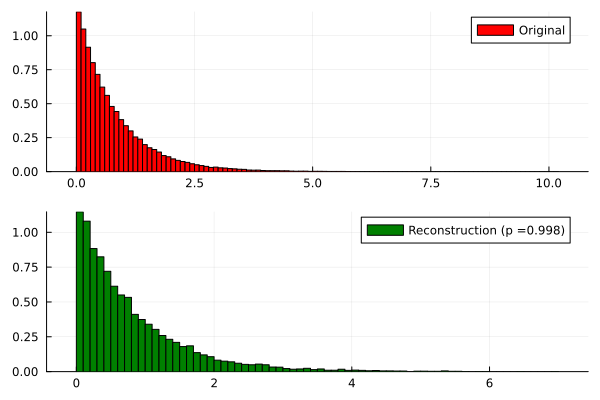

The two distributions are not significantly different (p = 0.998)

In [23]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

## Step 5
The test suggests that the two datasets are drawn from the same distribution. Thus, we will propose the estimates derived by the MLE and MoM

# Exercise 4

In [24]:
# Read data and convert to array
df = CSV.read("ex4_data.csv", DataFrame)
X = Matrix(df)[:,2]

10000-element Vector{Int64}:
 0
 2
 0
 0
 0
 2
 5
 6
 2
 1
 ⋮
 0
 1
 4
 0
 2
 0
 7
 0
 4

## Step 1

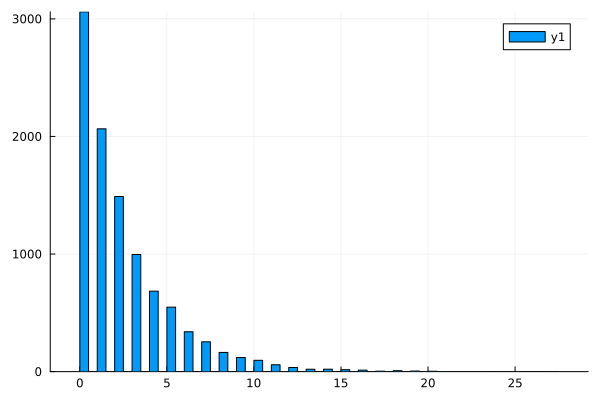

In [25]:
fig1 = plot()
histogram(X)

## Step 2
The data is most likely a geometric distribution with a probability mass function of $X \rightarrow P(x|p)=(1-p)^{x-1}p$. However, looking at the Julia documentation, the distribution implemented in Julia has a probability mass function of $P(X=k)=p(1-p)^{k}$, for $k=0,1,2,...$. Thus, we will be using this function in the succeeding steps.

## Step 3.a: 

#### Method of Moments
Let $X$ be Geometric random variables with parameter $p$. To get the method of moments estimator for $p$, we first show that $\mathbb{E}[X]=\frac{1}{p}$.
$$
\begin{aligned}
\mathbb{E}[X]&=\sum\limits_{x=1}^{\infty}xP(x-1)\\
&=\sum\limits_{x=1}^{\infty}x(p)(1-p)^{x-1} \\
&= 1(p)(1-p)^{0} + 2(p)(1-p)^{1} + 3(p)(1-p)^{2} + ...\\
\mathbb{E}[X]&= p + 2p(1-p) + 3p(1-p)^{2} + ...\\
(1-p)\mathbb{E}[X]&= \quad\quad p(1-p) + 2p(1-p)^{2} + 3p(1-p)^{3} + ...\\

&\textit{subtracting } (1-p)\mathbb{E}[X] \text{ from } \mathbb{E}[X] \text{, we get}\\

\mathbb{E}[X] - (1-p)\mathbb{E}[X]&= p + p(1-p) + p(1-p)^{2} + ...\\
\mathbb{E}[X] + (-1+p)\mathbb{E}[X]&= p + p(1-p) + p(1-p)^{2} + ...\\
\cancel{\mathbb{E}[X] - \mathbb{E}[X]} + p\mathbb{E}[X]&= p + p(1-p) + p(1-p)^{2} + ...\\
p\mathbb{E}[X]&= p + p(1-p) + p(1-p)^{2} + ...\\
\mathbb{E}[X]&= 1 + (1-p) + (1-p)^{2} + ...\\
\mathbb{E}[X]&= \sum\limits_{x=0}^{\infty}(1-p)^{x} \\
\mathbb{E}[X]&= \frac{1}{1-(1-p)} \\
\mathbb{E}[X]&= \frac{1}{p} \quad \blacksquare
\end{aligned}
$$

Next, we set the theoretical and sample moments equal to each other using the equation $\mu=\bar{x}$. We know that $\mu=\mathbb{E}[X]$ and $\bar{x} = M_1 = \frac{1}{n}\sum_{i=i}^{n} X_{i}$. Since Julia's implementation of geometric random variables starts from 0 (i.e. it counts the number of failures before the first success, in contrast to the number of trials before a success), we can modify $M_1$ such that $M_1 = 1+ (\frac{1}{n}\sum_{i=0}^{n} X_{i})$. It follows that $\mathbb{E}\left[X\right] = M_1 = 1+ (\frac{1}{n}\sum_{i=0}^{n} X_{i}) = \frac{1}{p}$. Therefore, $\frac{1}{p} \approx \frac{1}{\hat{p}} = 1+ (\frac{1}{n}\sum_{i=0}^{n} X_{i})$.


### Maximum Likelihood Estimation
Let $X$ be Geometric random variables. To calculate the maximum likelihood estimate, we have

$$
\begin{aligned}
L(p|\xi)=&P(X_1=x_1, X_2=x_2, ... X_n=x_n|p)\\
=&\prod_{i=1}^{n}f(x_i|p)\\
=&\prod_{i=1}^{n}p(1-p)^{x_i}\\
=&p^n(1-p)^{\sum_{i=1}^{n}x_{i}}\\
&\textit{taking the log-likelihood, }\\
l(p|\xi)=&ln\Big(p^n(1-p)^{\sum_{i=1}^{n}x_{i}}\Big)\\
=&\ln(p^n)+\ln\Big((1-p)^{\sum_{i=1}^{n}x_{i}}\Big)\\
=&n\ln(p)+\Big(\sum_{i=1}^{n}x_{i}\Big)\ln(1-p)\\
&\textit{taking the partial derivative, }  &\\
\frac{\partial}{\partial p}l(p)=&\frac{\partial}{\partial p}n\ln(p)+\frac{\partial}
{\partial p}\Big(\sum_{i=1}^{n}x_{i}\Big)\ln(1-p)\\
0=&n\frac{\partial}{\partial p}\ln(p)+\Big(\sum_{i=1}^{n}x_{i}\Big)\frac{\partial}{\partial p}\ln(1-p)\\
=&n\frac{1}{p}-\Big(\sum_{i=1}^{n}x_{i}\Big)\frac{1}{1-p}\\
=&\frac{n}{p}-\frac{\sum_{i=1}^{n}x_{i}}{1-p}\\
\Big(\frac{1-p}{n}\Big)\Big(\frac{n}{p}\Big)=&\Big(\frac{\sum_{i=1}^{n}x_{i}}{1-p}\Big)\Big(\frac{1-p}{n}\Big)\\
\frac{1-p}{p}=&\frac{\sum_{i=1}^{n}x_{i}}{n}\\
\frac{1}{p}-\frac{p}{p}=&\frac{\sum_{i=1}^{n}x_{i}}{n}\\
\frac{1}{p}-1=&\frac{\sum_{i=1}^{n}x_{i}}{n}\\
\frac{1}{p}=&\frac{\sum_{i=1}^{n}x_{i}}{n}+1
\end{aligned}
$$

Converting the derived estimators above to code, we have the function `geometric_mean_estimator()`.

In [26]:
function geometric_mean_estimator(samples)
    return 1/(mean(samples)+1)
end

geometric_mean_estimator (generic function with 1 method)

## Step 3.b:

As calculated above, the Method of Moments estimator for geometric random variables is $\frac{1}{p} \approx 1+ (\frac{1}{n}\sum_{i=0}^{n} X_{i})$, while the Maximum Likelihood Estimation yields $\frac{1}{p}=\frac{\sum_{i=1}^{n}x_{i}}{n}+1$. Since both estimators are the same, we can use these as estimators for the succeeding steps.

## Step 4.a

In [27]:
mu_hat = geometric_mean_estimator(X)
sim_d = Geometric(mu_hat)
X_hat = rand(sim_d, 10000)

10000-element Vector{Int64}:
 0
 0
 3
 9
 4
 2
 0
 5
 0
 3
 ⋮
 0
 2
 7
 4
 1
 0
 2
 2
 1

## Step 4.b

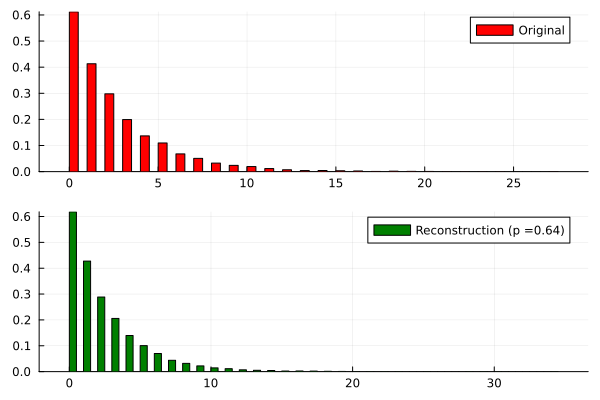

The two distributions are not significantly different (p = 0.64)

In [28]:
plot_reconstruction(X, X_hat)
if_dist_different(X, X_hat)

## Step 5
The test suggests that the two datasets are drawn form the same distribution. Thus, we will propose the estimates derived by the MLE and MoM, $\frac{1}{p}=\frac{\sum_{i=1}^{n}x_{i}}{n}+1$.

# Exercise 5

In [29]:
dataset = CSV.read("ex5_data.csv", DataFrame);
raw_data = dataset[:,2]

100000-element Vector{Int64}:
 3
 1
 2
 1
 3
 4
 1
 1
 3
 3
 ⋮
 2
 3
 0
 3
 1
 2
 2
 1
 0

# Step 1 

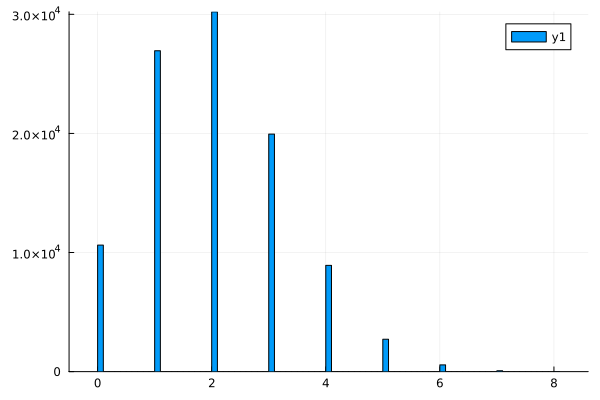

In [30]:
exercise_5_fig = plot()
histogram(raw_data,bins=100)

## Step 2
The data are most likely samples from a binomial distribution with a PMF of:
$$P(X = x) = {n \choose x} p^x(1-p)^{n-x}$$
for $k = 0,1,2...$

Since the implementation is the same for Julia's `Binomial()` distribution, we will be using this for the next step. 

## Step 3.a
### Method of Moments
Let $X$ be Binomial random variables with parameters $n$ and $p$. To get the method of moments estimator for $n$ and $p$, we first show that $\mathbb{E}[X]=\frac{n}{p}$.

$$\begin{aligned}
\mathbb{E}\left[X\right] =& \sum_{x} x P\left(X = x\right)\\
\mathbb{E}\left[X\right] =& \sum_{x} x P\left(X = x\right) = \sum_{x = 0}^{n} x{n \choose x}p^{x}(1-p)^{n-x}\\ 
\sum_{x = 1}^{n} x{n \choose x}p^{x}(1-p)^{n-x} =& \sum_{x = 1}^{n} x\left(\frac{n!}{x!(n-x)!}\right)p^{x}(1-p)^{n-x}\\ 
\mathbb{E}\left[X\right] =& \sum_{x = 1}^{n}\left(\frac{n!}{(x-1)!(n-x)!}\right)p^{x}(1-p)^{n-x}\\
\mathbb{E}\left[X\right] =& np \sum_{x = 1}^{n}\left(\frac{(n-1)!}{(x-1)!(n-x)!}\right)p^{x-1}(1-p)^{n-x}\\
\mathbb{E}\left[X\right] =& np \sum_{y = 0}^{m}\left(\frac{m!}{y!(m-y)!}\right)p^{y}(1-p)^{m-y}\\
\end{aligned}$$
By the Binomial Theorem, $\left(a+b\right)^{m} = \sum_{y=0}^{m} {m \choose y} a^{y}b^{m-y}$. 

It then follows that $\left((p)+(1-p)\right)^{m} = 1$. Thus, $\mathbb{E}\left[X\right] = np(1) = np \quad \blacksquare$

#### Estimating n and p

$$
\begin{aligned}
\mathbb{E}\left[X\right] =& \frac{1}{n}\sum_{i}X_i\\ 
Var\left[X\right] =& \frac{1}{n}\sum_i \left(X_i - \bar{x}\right)^2\\
np =& \frac{1}{n}\sum_{i}X_i (Eqn 1)\\
np(1-p) =& \frac{1}{n}\sum_i \left(X_i - \bar{x}\right)^2 (Eqn 2)\\
\end{aligned}
$$
We need to solve the system of equations to obtain values for $n$ and $p$. Notice that we can rewrite Eqn 1 as $n^2 p = \sum_i {X_i}$ and Eqn 2 as $n^2 p \left(1-p\right) = \sum_i \left(X_i - \bar{x}\right)^2$. Thus, we have:

$$p \approx \hat{p} = 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i},$$
$$n \approx \hat{n} = \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}$$

### Maximum Likelihood Estimation
Let X be Binomial random variables. To calculate the maximum likelihood estimate, we have: 
$$
\begin{aligned}
L(p|\xi)=&P(X_1=x_1, X_2=x_2, ... X_n=x_n|p)\\
=&\prod_{i=1}^{n}f(x_i|p)\\
=&\prod_{i=1}^{n}{n \choose x}p^x(1-p)^{n-x_i} \\
=&\prod_{i=1}^{n}{n \choose x}p^{\sum X_i}(1-p)^{\sum n-\sum x_i}
\end{aligned}
$$
<p style="text-align: center;">Taking the log likelihood</p>

$$ \begin{aligned}
ln(L(p)) =& ln(k) + \sum x_i ln(p) + (n^2-\sum x_i) ln(1-p)\\
\end{aligned}$$
<p style="text-align: center;">Taking the partial derivative</p>

$$ \begin{aligned}
\frac{\partial}{\partial p}ln(L(p)) =& 0 + \sum x_i \frac{\partial}{\partial p}ln(p) + (n^2-\sum x_i) \frac{\partial}{\partial p}ln(1-p) \\
\frac{\partial}{\partial p}ln(L(p)) =& \frac{\sum x_i}{p} - \frac{n^2-\sum x_i}{1-p} (Eqn 1)
\end{aligned}$$
<p style="text-align: center;">equate to zero</p>

$$ \frac{\partial}{\partial p}ln(L(p)) = 0$$

$$ \begin{aligned}
\frac{\sum x_i}{p} -& \frac{n^2 - \sum x_i}{1-p} = 0\\
\frac{\sum x_i}{p} =& \frac{n^2 - \sum x_i}{1-p} \\
(1-p)\sum x_i =& p(n^2 - \sum x_i)\\
\sum x_i - \cancel{p\sum x_i} =& pn^2 - \cancel{p\sum x_i}\\
\sum x_i =& pn^2\\
p =& \frac{\sum x_i}{n^2}\\
\end{aligned}$$

Now we have the MLE
$$\sum X_i = pn^2$$
or more simply
$$\bar{x} = pn$$

Since we already know that for the binomial distribution, $E[X] = np$, we can infer that the MLE is the same as the Method of Moments estimators.

## Step 3.a

In [32]:
## Step 3.a.: MoM 
function binom_p_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return 1 - sum_sq_diff/sum_x
end

function binom_n_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return mean_x / (1 - (sum_sq_diff/sum_x))
end

binom_n_estimator (generic function with 1 method)

## Step 3.b

In [34]:
p = binom_p_estimator(raw_data);
n = binom_n_estimator(raw_data);

In [35]:
# sanity check
x_bar = mean(raw_data);
prod = p*n;
println("x_bar = $x_bar p*n = $prod")

x_bar = 2.0042 p*n = 2.0042


## Step 4.a

In [36]:
# round, since the estimate does not provide integer
binomial_sim_dist = Binomial(round(n), p);
sim_data = rand(binomial_sim_dist, 100000);

## Step 4.b

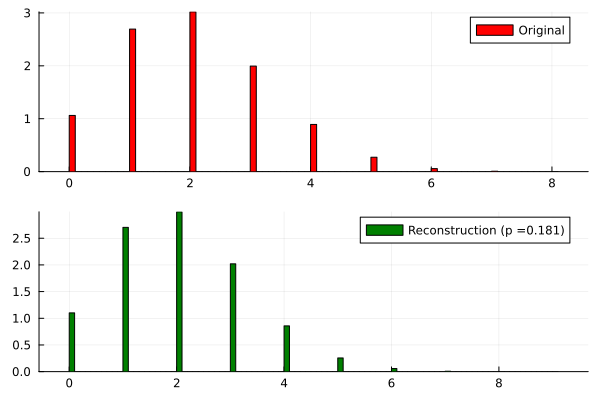

The two distributions are not significantly different (p = 0.181)

In [37]:
plot_reconstruction(raw_data, sim_data)
if_dist_different(raw_data, sim_data)

## Step 5
Since the test suggests that the two datasets are drawn from the same distribution with no significant difference, we propose the model derived from the MoM and MLE:

$$p \approx \hat{p} = 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}$$
and
$$n \approx \hat{n} = \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}$$